In [1]:
# Standard imports
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import levene

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# .py imports

import explore as e
import prepare as prep
import pretty as muah
import knear as k

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# get data set
df = pd.read_csv('PGA_data.csv', index_col=0)

In [3]:
# dropped all nulls
df = df.dropna()

In [4]:
#lower case all column names
df.columns  = df.columns.str.lower()

In [5]:
# this study focuses on performance the previous week. Therefore, I am dropping the following columns
df = df.drop(columns=['height cm', 'weight lbs', 'dob', 'age','player id', 'tournament id',
                'season', 'visibility', 'winddirdegree', 'windspeedkmph', 'greensgrass','fariwaysgrass', 
                'water','bunkers', 'windchillc','windgustkmph', 'cloudcover', 'humidity','precipmm','pressure',
                'tempc', 'final position', 'major', 'consecutive_cuts_made', 'finish','moonrise', 'sunrise',
                'sunset', 'dewpointc', 'feelslikec', 'heatindexc', 'maxtempc','mintempc','totalsnow_cm', 'sunhour',
                'uvindex', 'moon_illumination', 'moonset', 'place','number of rounds', 'score', 'slope','length','par'])

In [6]:
df = df.rename(columns={'tournament name':'tournament_name', 'drive yards':'driving_avg',
                        'fairways hit':'fairways_hit', 'putts/hole':'putting_avg'})

In [7]:
# check it out dataframe after removal of unneccessary columns
df.head()

,date,course,tournament_name,made_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,sg_putt_prev,sg_arg_prev,sg_app_prev,sg_ott_prev,sg_t2g_prev,sg_total_prev,driving_avg,fairways_hit,putting_avg
player,,,,,,,,,,,,,,,,,,,
Robert Allenby,20/05/2018,"Trinity Forest - Dallas, TX",AT&T Byron Nelson,1.0,1.06,-1.32,-1.07,-0.73,-3.12,-2.07,0.17,-0.93,0.65,-0.30,-0.57,-0.40,286.9,65.6,1.84
Robert Allenby,10/06/2018,"TPC Southwind, Memphis, TN",FedEx St. Jude Classic,0.0,-1.07,-0.48,0.71,-0.01,0.22,-0.85,1.06,-1.32,-1.07,-0.73,-3.12,-2.07,286.9,65.6,1.84
Robert Allenby,15/07/2018,"TPC Deere Run - Silvis, IL",John Deere Classic,0.0,-1.78,-0.18,-0.77,-0.52,-1.47,-3.25,-1.07,-0.48,0.71,-0.01,0.22,-0.85,286.9,65.6,1.84
Robert Allenby,23/07/2018,"Keene Trace - Nicholasville, KY",Barbasol Championship,0.0,-2.30,-0.61,1.13,-0.10,0.42,-1.87,-1.78,-0.18,-0.77,-0.52,-1.47,-3.25,286.9,65.6,1.84
Robert Allenby,21/07/2019,"Keene Trace - Nicholasville, KY",Barbasol Championship,0.0,-2.34,-0.38,-2.23,-0.22,-2.83,-5.17,-2.32,-0.31,-1.75,-0.35,-2.40,-4.73,293.8,60.7,1.77


In [8]:
# feature engineer 2wk performance average
df['sg_putt_2wk_avg'] = (df.sg_putt + df.sg_putt_prev)/2
df['sg_arg_2wk_avg'] = (df.sg_arg + df.sg_arg_prev)/2
df['sg_app_2wk_avg'] = (df.sg_app + df.sg_app_prev)/2
df['sg_ott_2wk_avg'] = (df.sg_ott + df.sg_ott_prev)/2
df['sg_t2g_2wk_avg'] = (df.sg_t2g + df.sg_t2g_prev)/2
df['sg_total_2wk_avg'] = (df.sg_total + df.sg_total_prev)/2


In [9]:
# check it out
df.head()

,date,course,tournament_name,made_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,...,sg_total_prev,driving_avg,fairways_hit,putting_avg,sg_putt_2wk_avg,sg_arg_2wk_avg,sg_app_2wk_avg,sg_ott_2wk_avg,sg_t2g_2wk_avg,sg_total_2wk_avg
player,,,,,,,,,,,,,,,,,,,,,
Robert Allenby,20/05/2018,"Trinity Forest - Dallas, TX",AT&T Byron Nelson,1.0,1.06,-1.32,-1.07,-0.73,-3.12,-2.07,...,-0.40,286.9,65.6,1.84,0.615,-1.125,-0.21,-0.515,-1.845,-1.235
Robert Allenby,10/06/2018,"TPC Southwind, Memphis, TN",FedEx St. Jude Classic,0.0,-1.07,-0.48,0.71,-0.01,0.22,-0.85,...,-2.07,286.9,65.6,1.84,-0.005,-0.900,-0.18,-0.370,-1.450,-1.460
Robert Allenby,15/07/2018,"TPC Deere Run - Silvis, IL",John Deere Classic,0.0,-1.78,-0.18,-0.77,-0.52,-1.47,-3.25,...,-0.85,286.9,65.6,1.84,-1.425,-0.330,-0.03,-0.265,-0.625,-2.050
Robert Allenby,23/07/2018,"Keene Trace - Nicholasville, KY",Barbasol Championship,0.0,-2.30,-0.61,1.13,-0.10,0.42,-1.87,...,-3.25,286.9,65.6,1.84,-2.040,-0.395,0.18,-0.310,-0.525,-2.560
Robert Allenby,21/07/2019,"Keene Trace - Nicholasville, KY",Barbasol Championship,0.0,-2.34,-0.38,-2.23,-0.22,-2.83,-5.17,...,-4.73,293.8,60.7,1.77,-2.330,-0.345,-1.99,-0.285,-2.615,-4.950


In [10]:
#drop previous and current weeks performance columns
df = df.drop(columns = ['sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total',
                        'sg_putt_prev','sg_arg_prev','sg_app_prev','sg_ott_prev',
                        'sg_t2g_prev','sg_total_prev'])
df.head()

,date,course,tournament_name,made_cut,driving_avg,fairways_hit,putting_avg,sg_putt_2wk_avg,sg_arg_2wk_avg,sg_app_2wk_avg,sg_ott_2wk_avg,sg_t2g_2wk_avg,sg_total_2wk_avg
player,,,,,,,,,,,,,
Robert Allenby,20/05/2018,"Trinity Forest - Dallas, TX",AT&T Byron Nelson,1.0,286.9,65.6,1.84,0.615,-1.125,-0.21,-0.515,-1.845,-1.235
Robert Allenby,10/06/2018,"TPC Southwind, Memphis, TN",FedEx St. Jude Classic,0.0,286.9,65.6,1.84,-0.005,-0.900,-0.18,-0.370,-1.450,-1.460
Robert Allenby,15/07/2018,"TPC Deere Run - Silvis, IL",John Deere Classic,0.0,286.9,65.6,1.84,-1.425,-0.330,-0.03,-0.265,-0.625,-2.050
Robert Allenby,23/07/2018,"Keene Trace - Nicholasville, KY",Barbasol Championship,0.0,286.9,65.6,1.84,-2.040,-0.395,0.18,-0.310,-0.525,-2.560
Robert Allenby,21/07/2019,"Keene Trace - Nicholasville, KY",Barbasol Championship,0.0,293.8,60.7,1.77,-2.330,-0.345,-1.99,-0.285,-2.615,-4.950


In [11]:
#change tournament date to datetime
df.date = pd.to_datetime(df.date)

# Univariate analysis
- Check out distributions of variables in the dataset

SUMMARY REPORT
          
          
Dataframe head: 
                     date                           course  \
player                                                       
Robert Allenby 2018-05-20      Trinity Forest - Dallas, TX   
Robert Allenby 2018-10-06       TPC Southwind, Memphis, TN   
Robert Allenby 2018-07-15       TPC Deere Run - Silvis, IL   
Robert Allenby 2018-07-23  Keene Trace - Nicholasville, KY   
Robert Allenby 2019-07-21  Keene Trace - Nicholasville, KY   

                       tournament_name  made_cut  driving_avg  fairways_hit  \
player                                                                        
Robert Allenby       AT&T Byron Nelson       1.0        286.9          65.6   
Robert Allenby  FedEx St. Jude Classic       0.0        286.9          65.6   
Robert Allenby      John Deere Classic       0.0        286.9          65.6   
Robert Allenby   Barbasol Championship       0.0        286.9          65.6   
Robert Allenby   Barbasol Championshi

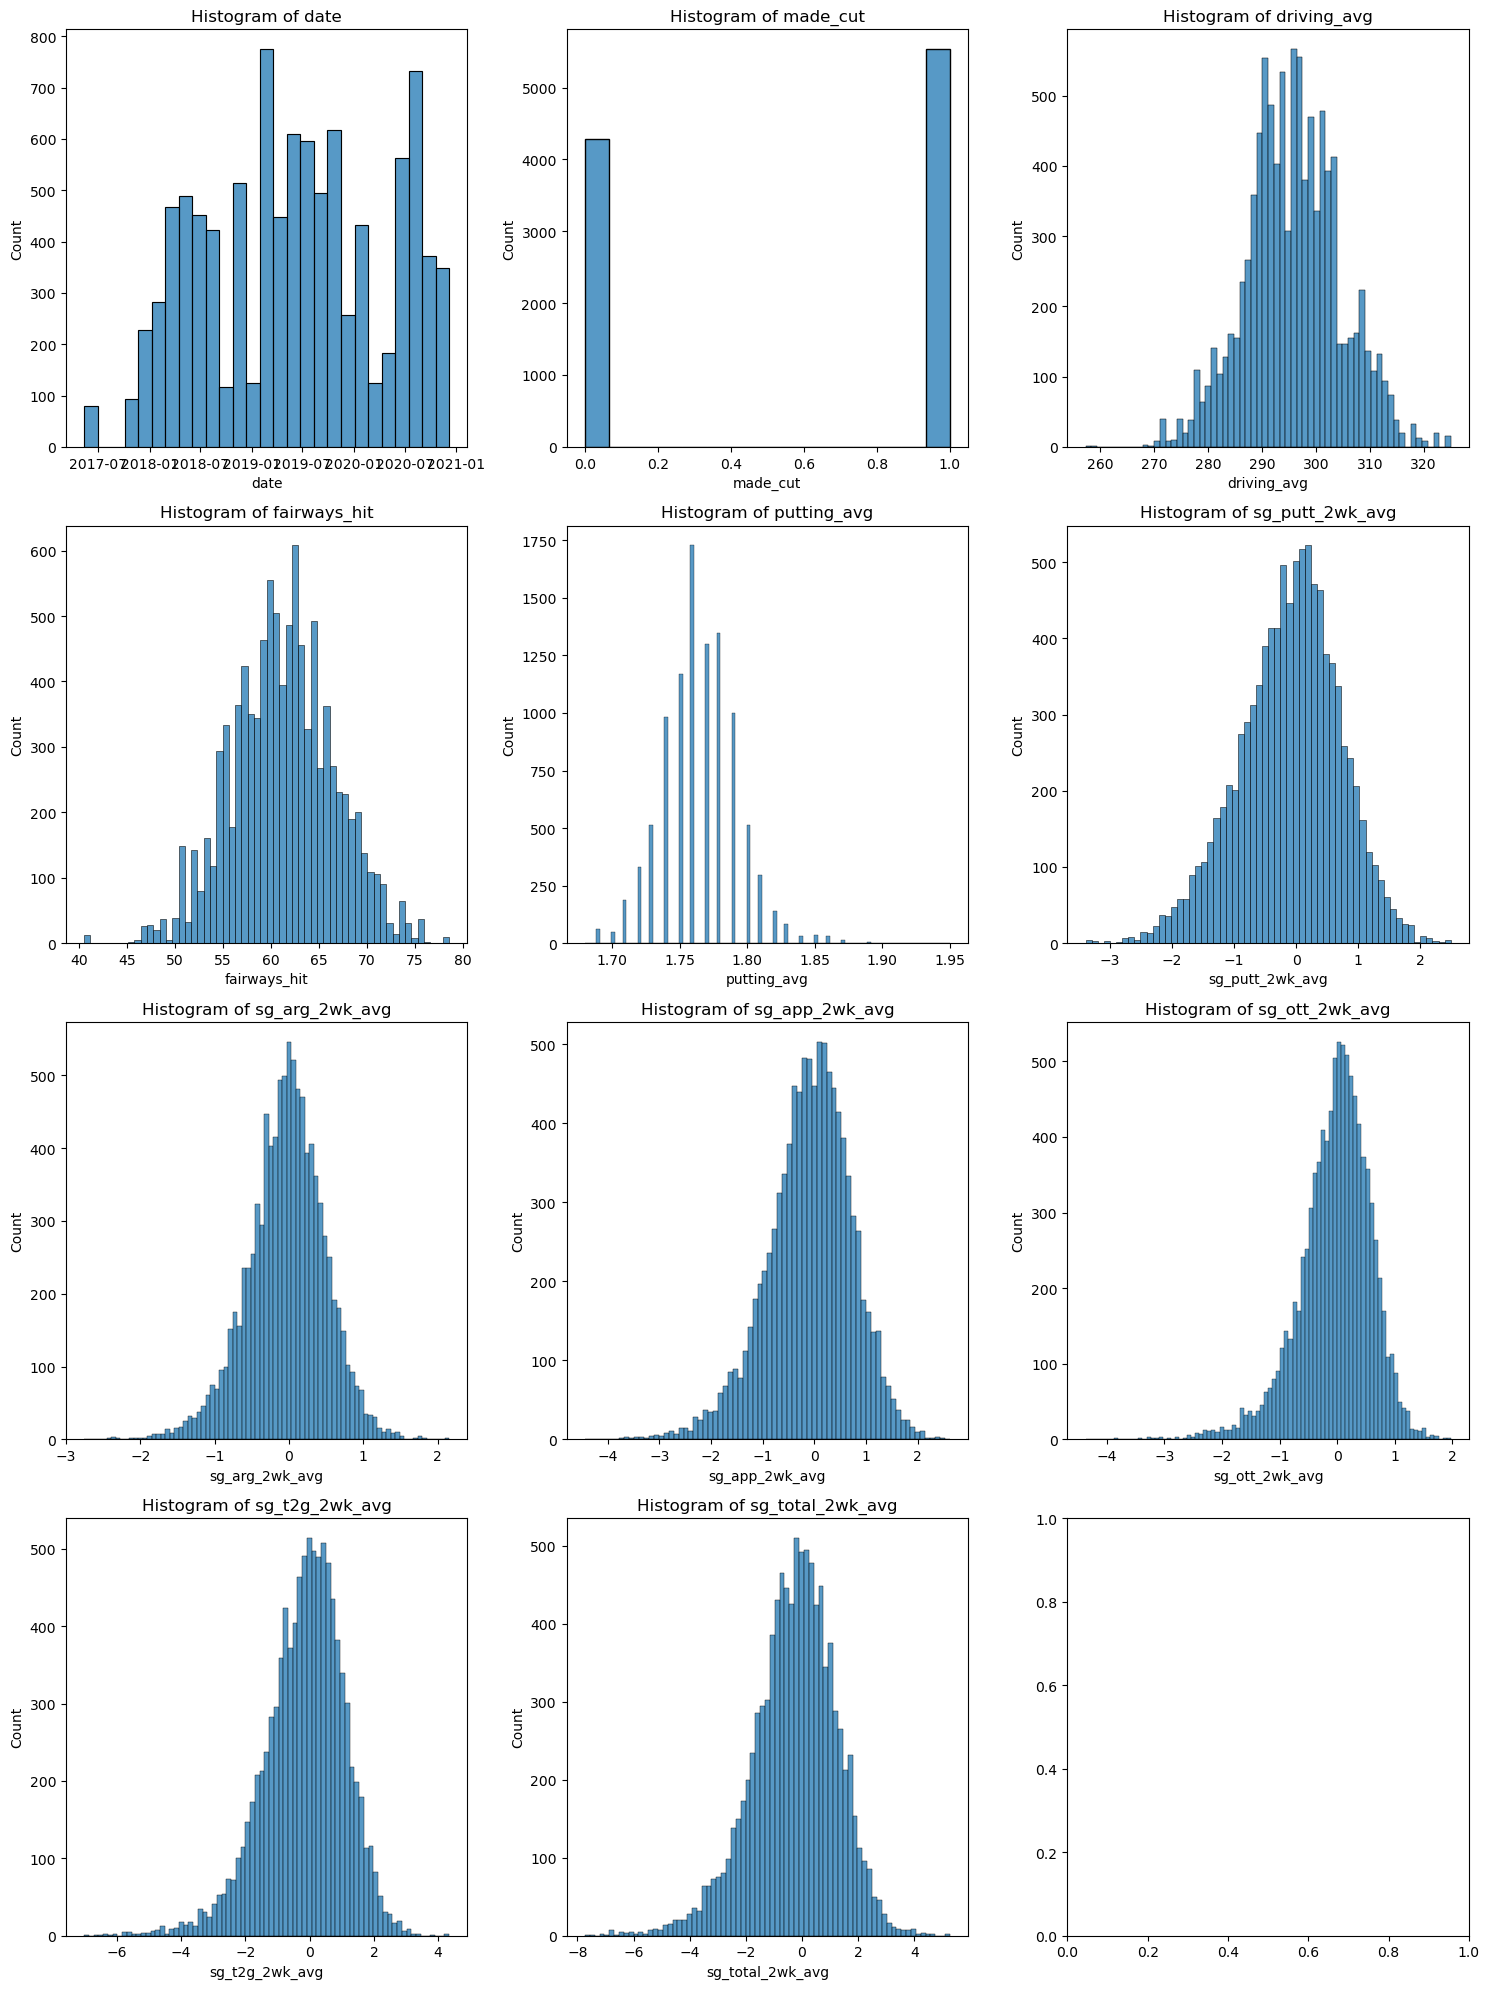

In [12]:
# use function to analyze summary statistics of selected features
prep.summarize(df)

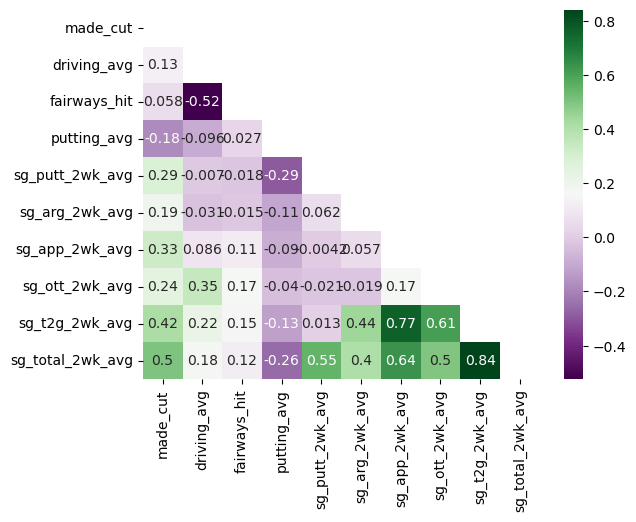

In [13]:
#checkout correlations
# Correlation heat map
figsize=(12, 8)
sns.heatmap(df.corr(method='pearson'), cmap='PRGn', annot=True,
           mask=np.triu(df.corr(method='pearson')))
plt.show()

# Train, Test, Split

In [14]:
#split data
train, validate, test = prep.split_data(df, 'made_cut')
train.head()

,date,course,tournament_name,made_cut,driving_avg,fairways_hit,putting_avg,sg_putt_2wk_avg,sg_arg_2wk_avg,sg_app_2wk_avg,sg_ott_2wk_avg,sg_t2g_2wk_avg,sg_total_2wk_avg
0,2018-08-26,"Ridgewood - Paramus, NJ",The Northern Trust,0.0,292.7,60.9,1.80,-0.665,-0.525,-0.690,-0.785,-2.005,-2.670
1,2020-06-28,"TPC River Highlands - Cromwell, CT",Travelers Championship,0.0,301.7,56.5,1.78,0.275,0.020,0.090,0.250,0.365,0.640
2,2018-02-25,"PGA National - Palm Beach Gardens, FL",The Honda Classic,0.0,289.3,52.0,1.81,0.920,-0.260,-0.165,-1.965,-2.390,-1.465
3,2018-04-02,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,0.0,296.2,55.2,1.79,0.105,-0.320,0.865,0.195,0.740,0.845
4,2019-03-17,"TPC Sawgrass - Ponte Vedra Beach, FL",The Players Championship,1.0,300.5,60.7,1.78,1.055,-0.385,0.460,0.155,0.225,1.275


In [15]:
# reset index
train = train.reset_index(drop=True)
validate = validate.reset_index(drop=True)
test = test.reset_index(drop=True)

# Set Target
- my target is whether or not someone makes the cut. Which is a categorical variable (I will use classification models to predict this outcome).

In [16]:
# check out target descriptive statistics
train.made_cut.value_counts()

1.0    3319
0.0    2572
Name: made_cut, dtype: int64

In [17]:
# baseline percentage of those who made cut
3319/(3319+2572)

0.5634017993549483

- if you were to pick at random a player and guess if they will make the cut, you'd be correct 56% of the time. This will be our baseline prediction.

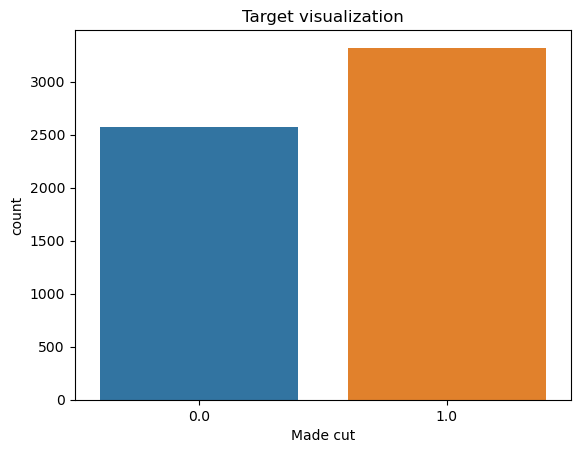

In [18]:
# visualize cuts made within the data set
sns.countplot(data=train, x= 'made_cut')
plt.title('Target visualization')
plt.xlabel('Made cut')
plt.show()

# Explore
- bivariate analysis

In [19]:
# set alpha for statistics tests
alpha = 0.05

# Do strokes gained putting 2 week average affect whether or not someone will make the cut this week?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean strokes gained putting 2 week average of players who made the cut <= Mean strokes gained putting 2 week average of players who did not make the cut.

$H_{a}$ : Mean strokes gained putting 2 week average of players who made the cut > Mean strokes gained putting 2 week average of players who did not make the cut.

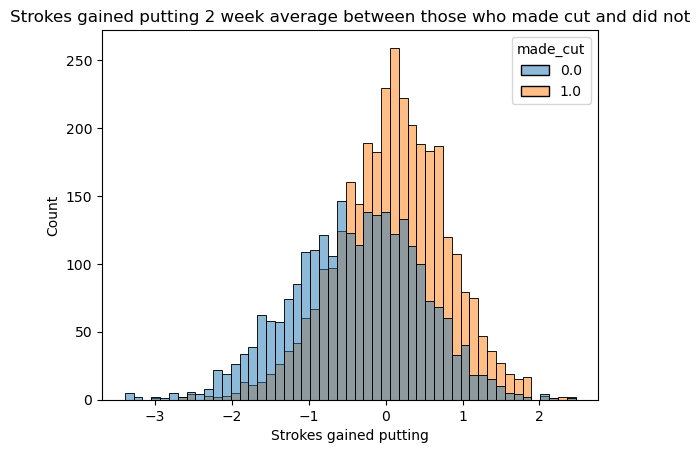

In [20]:
# visualize strokes gained putting 2 week average to making the cut in the next week
sns.histplot(data=train, x='sg_putt_2wk_avg', hue='made_cut')
plt.title('Strokes gained putting 2 week average between those who made cut and did not')
plt.xlabel('Strokes gained putting')
plt.show()

##### Verify assumptions
- equal variances and normal distribution
    - Levene's test and Shapiro's test
    - We can use the central limit theorm to assume normalcy

In [21]:
# make sub groups of those who made or didn't make the cut based on strokes gained putting 2 week average
made_cut_yes = train[train.made_cut == 1].sg_putt_2wk_avg
made_cut_no = train[train.made_cut == 0].sg_putt_2wk_avg

In [22]:
# compare means of the two groups
print('Strokes gained putting average of players who made cut:', made_cut_yes.mean())
print('Strokes gained putting average of players who did not make the cut:', made_cut_no.mean())

Strokes gained putting average of players who made cut: 0.08462338053630615
Strokes gained putting average of players who did not make the cut: -0.38654548989113524


In [23]:
#verify equal variance
stat, p = levene(made_cut_yes, made_cut_no)
p

3.3533258113319506e-22

In [24]:
#run stats test
t, p = stats.ttest_ind(made_cut_yes, made_cut_no, equal_var=False)
t, p / 2

(22.656464570682832, 1.3716755135249826e-108)

In [25]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We il to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between strokes gained putting 2 week average in the previous week and whether or not a player makes the cut in the following week.  I will use this feature in my model.

# Do strokes gained around green 2 week average affect whether or not someone will make the cut this week?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean strokes gained around green 2 week average of players who made the cut <= Mean of strokes gained around green 2 week average of players who did not make the cut.

$H_{a}$ : Mean strokes gained around green 2 week average of players who made the cut > Mean of strokes gained around green 2 week average of players who did not make the cut.

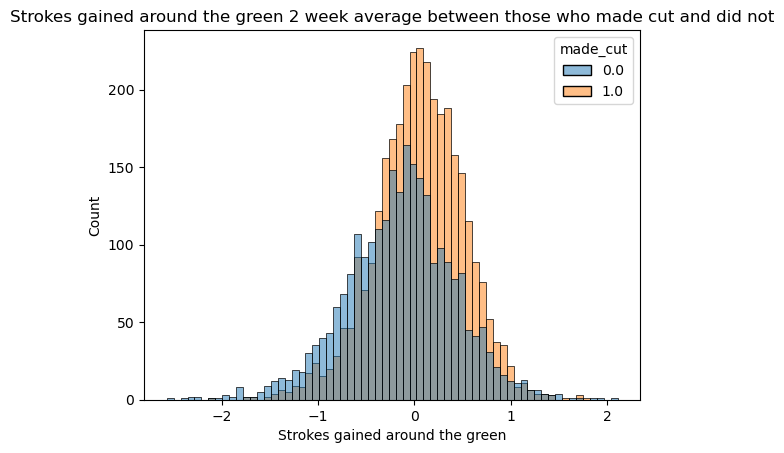

In [26]:
# visualize strokes gained around green 2 week average to making the cut in the next week
sns.histplot(data=train, x='sg_arg_2wk_avg', hue='made_cut')
plt.title('Strokes gained around the green 2 week average between those who made cut and did not')
plt.xlabel('Strokes gained around the green')
plt.show()

##### Verify assumptions
- equal variances and normal distribution
    - Levene's test and Shapiro's test
    - We can use the central limit theorm to assume normalcy

In [27]:
# make sub groups of those who made or didn't make the cut based on strokes gained around green 2 week average
made_cut_yes = train[train.made_cut == 1].sg_arg_2wk_avg
made_cut_no = train[train.made_cut == 0].sg_arg_2wk_avg

In [28]:
# compare means of the two groups
print('Strokes gained around the green average of players who made cut:', made_cut_yes.mean())
print('Strokes gained around the green average of players who did not make the cut:', made_cut_no.mean())

Strokes gained around the green average of players who made cut: 0.048767701114793616
Strokes gained around the green average of players who did not make the cut: -0.14643468118195935


In [29]:
#verify equal variance
stat, p = levene(made_cut_yes, made_cut_no)
p

1.1773336122387447e-19

- Levene's test results: The small p-value (less than alpha = 0.05) suggests that the populations do not have equal variances.

In [30]:
#run stats test
t, p = stats.ttest_ind(made_cut_yes, made_cut_no, equal_var=False)
t, p / 2

(14.111901313868294, 1.1781730939378334e-44)

In [31]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between strokes gained around green 2 week average and whether or not a player makes the cut in the following week.  I will use this feature in my model.

# Do strokes gained approach 2 week average affect whether or not someone will make the cut this week?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean strokes gained approach 2 week average of players who made the cut <= Mean of strokes gained approach 2 week average of players who did not make the cut.

$H_{a}$ : Mean strokes gained approach 2 week average of players who made the cut > Mean of strokes gained approach 2 week average of players who did not make the cut.

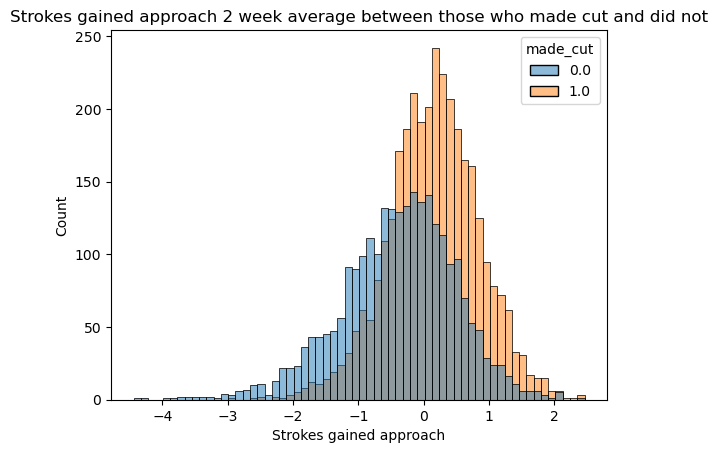

In [32]:
# visualize strokes gained approach 2 week average to making the cut in the next week
sns.histplot(data=train, x='sg_app_2wk_avg', hue='made_cut')
plt.title('Strokes gained approach 2 week average between those who made cut and did not')
plt.xlabel('Strokes gained approach')
plt.show()

##### Verify assumptions
- equal variances and normal distribution
    - Levene's test and Shapiro's test
    - We can use the central limit theorm to assume normalcy

In [33]:
# make sub groups of those who made or didn't make the cut based on strokes gained approach 2 week average
made_cut_yes = train[train.made_cut == 1].sg_app_2wk_avg
made_cut_no = train[train.made_cut == 0].sg_app_2wk_avg

In [34]:
# compare means of the two groups
print('Strokes gained approach average of players who made cut:', made_cut_yes.mean())
print('Strokes gained approach average of players who did not make the cut:', made_cut_no.mean())

Strokes gained approach average of players who made cut: 0.1465802952696594
Strokes gained approach average of players who did not make the cut: -0.3960283825816485


In [35]:
#verify equal variance
stat, p = levene(made_cut_yes, made_cut_no)
p

1.745180608356306e-27

- Levene's test results: The small p-value (less than alpha = 0.05) suggests that the populations do not have equal variances.

In [36]:
#run stats test
t, p = stats.ttest_ind(made_cut_yes, made_cut_no, equal_var=False)
t, p / 2

(25.571946450987753, 1.2726136643212333e-135)

In [37]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between strokes gained approach 2 week average and whether or not a player makes the cut in the following week.  I will use this feature in my model.

# Do strokes gained off-the-tee 2 week average affect whether or not someone will make the cut this week?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean strokes gained off-the-tee 2 week average of players who made the cut <= Mean strokes gained off-the-tee 2 week average of players who did not make the cut.

$H_{a}$ : Mean strokes gained off-the-tee 2 week average of players who made the cut > Mean strokes gained off-the-tee 2 week average of players who did not make the cut.

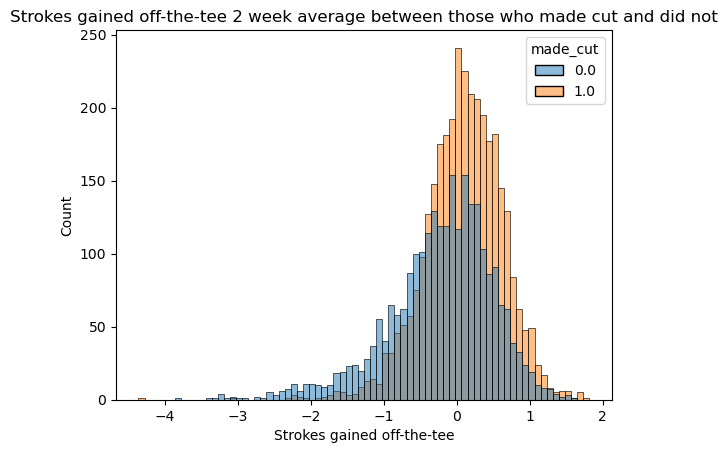

In [38]:
# visualize strokes gained off-the-tee 2 week average to making the cut in the next week
sns.histplot(data=train, x='sg_ott_2wk_avg', hue='made_cut')
plt.title('Strokes gained off-the-tee 2 week average between those who made cut and did not')
plt.xlabel('Strokes gained off-the-tee')
plt.show()

##### Verify assumptions
- equal variances and normal distribution
    - Levene's test and Shapiro's test
    - We can use the central limit theorm to assume normalcy

In [39]:
# make sub groups of those who made or didn't make the cut based on strokes gained off-the-tee 2 week average
made_cut_yes = train[train.made_cut == 1].sg_ott_2wk_avg
made_cut_no = train[train.made_cut == 0].sg_ott_2wk_avg

In [40]:
# compare means of the two groups
print('Strokes gained off-the-tee average of players who made cut:', made_cut_yes.mean())
print('Strokes gained off-the-tee average of players who did not make the cut:', made_cut_no.mean())

Strokes gained off-the-tee average of players who made cut: 0.08758511599879483
Strokes gained off-the-tee average of players who did not make the cut: -0.22876555209953273


In [41]:
#verify equal variance
stat, p = levene(made_cut_yes, made_cut_no)
p

3.398226195175239e-36

- Levene's test results: The small p-value (less than alpha = 0.05) suggests that the populations do not have equal variances.

In [42]:
#run stats test
t, p = stats.ttest_ind(made_cut_yes, made_cut_no, equal_var=False)
t, p / 2

(18.573370593330296, 1.3330292966611525e-74)

In [43]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between strokes gained off-the-tee 2 week average and whether or not a player makes the cut in the following week.  I will use this feature in my model.

# Do strokes gained tee-to-green 2 week average affect whether or not someone will make the cut this week?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean strokes gained tee-to-green 2 week average of players who made the cut <= Mean strokes gained tee-to-green 2 week average of players who did not make the cut.

$H_{a}$ : Mean strokes gained tee-to-green 2 week average of players who made the cut > Mean strokes gained tee-to-green 2 week average of players who did not make the cut.

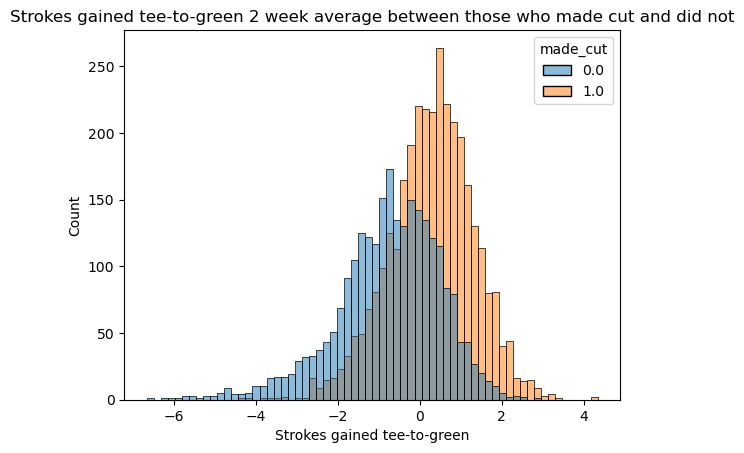

In [44]:
# visualize strokes gained tee-to-green 2 week average to making the cut in the next week
sns.histplot(data=train, x='sg_t2g_2wk_avg', hue='made_cut')
plt.title('Strokes gained tee-to-green 2 week average between those who made cut and did not')
plt.xlabel('Strokes gained tee-to-green')
plt.show()

##### Verify assumptions
- equal variances and normal distribution
    - Levene's test and Shapiro's test
    - We can use the central limit theorm to assume normalcy

In [45]:
# make sub groups of those who made or didn't make the cut based on strokes gained tee-to-green 2 week average
made_cut_yes = train[train.made_cut == 1].sg_t2g_2wk_avg
made_cut_no = train[train.made_cut == 0].sg_t2g_2wk_avg

In [46]:
# compare means of the two groups
print('Strokes gained tee-to-green average of players who made cut:', made_cut_yes.mean())
print('Strokes gained tee-to-green average of players who did not make the cut:', made_cut_no.mean())

Strokes gained tee-to-green average of players who made cut: 0.2829722808074718
Strokes gained tee-to-green average of players who did not make the cut: -0.7712888802488358


In [47]:
#verify equal variance
stat, p = levene(made_cut_yes, made_cut_no)
p

2.0756536517506434e-19

- Levene's test results: The small p-value (less than alpha = 0.05) suggests that the populations do not have equal variances.

In [48]:
#run stats test
t, p = stats.ttest_ind(made_cut_yes, made_cut_no, equal_var=False)
t, p / 2

(34.04728494271535, 2.1355226342130198e-228)

In [49]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between strokes gained tee-to-green 2 week average and whether or not a player makes the cut in the following week.  I will use this feature in my model.

# Do strokes gained total 2 week average affect whether or not someone will make the cut this week?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean strokes gained total 2 week average of players who made the cut <= Mean strokes gained total 2 week average of players who did not make the cut.

$H_{a}$ : Mean strokes gained total 2 week average of players who made the cut > Mean strokes gained total 2 week average of players who did not make the cut.

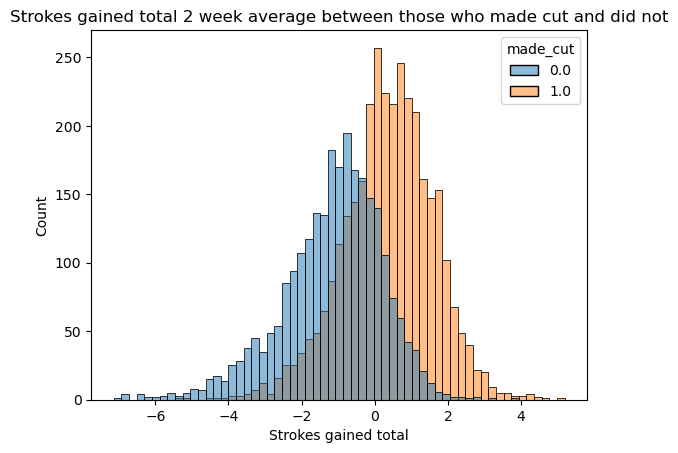

In [50]:
# visualize strokes gained total 2 week average to making the cut in the next week
sns.histplot(data=train, x='sg_total_2wk_avg', hue='made_cut')
plt.title('Strokes gained total 2 week average between those who made cut and did not')
plt.xlabel('Strokes gained total')
plt.show()

##### Verify assumptions
- equal variances and normal distribution
    - Levene's test and Shapiro's test
    - We can use the central limit theorm to assume normalcy

In [51]:
# make sub groups of those who made or didn't make the cut based on strokes gained total 2 week average
made_cut_yes = train[train.made_cut == 1].sg_total_2wk_avg
made_cut_no = train[train.made_cut == 0].sg_total_2wk_avg

In [52]:
# compare means of the two groups
print('Strokes gained total of players who made cut:', made_cut_yes.mean())
print('Strokes gained total of players who did not make the cut:', made_cut_no.mean())

Strokes gained total of players who made cut: 0.367713166616451
Strokes gained total of players who did not make the cut: -1.157678849144633


In [53]:
#verify equal variance
stat, p = levene(made_cut_yes, made_cut_no)
p

8.27954269983627e-05

- Levene's test results: The small p-value (less than alpha = 0.05) suggests that the populations do not have equal variances.

In [54]:
#run stats test
t, p = stats.ttest_ind(made_cut_yes, made_cut_no, equal_var=False)
t, p / 2

(43.9865127158694, 0.0)

In [55]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between strokes gained total 2 week average and whether or not a player makes the cut in the following week.  I will use this feature in my model.

# Does driving average affect whether or not someone will make the cut?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean driving average of players who made the cut <= Mean driving average of players who did not make the cut.

$H_{a}$ : Mean driving average of players who made the cut > Mean driving average of players who did not make the cut.

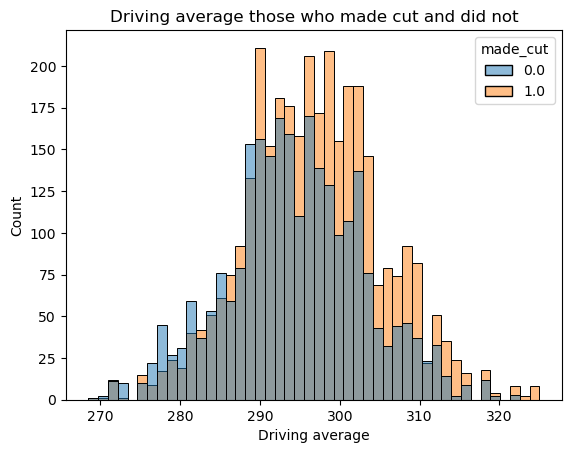

In [56]:
# visualize driving average to making the cut 
sns.histplot(data=train, x='driving_avg', hue='made_cut')
plt.title('Driving average those who made cut and did not')
plt.xlabel('Driving average')
plt.show()

##### Verify assumptions
- equal variances and normal distribution
    - Levene's test and Shapiro's test
    - We can use the central limit theorm to assume normalcy

In [57]:
# make sub groups of those who made or didn't make the cut based on driving average
made_cut_yes = train[train.made_cut == 1].driving_avg
made_cut_no = train[train.made_cut == 0].driving_avg

In [58]:
# compare means of the two groups
print('Driving average of players who made cut:', made_cut_yes.mean())
print('Driving average of players who did not make the cut:', made_cut_no.mean())

Driving average of players who made cut: 296.7669177463086
Driving average of players who did not make the cut: 294.4361586314157


In [59]:
#verify equal variance
stat, p = levene(made_cut_yes, made_cut_no)
p

0.8585647575642807

- Levene's test results: The p-value (larger than alpha = 0.05) suggests that the populations do have equal variances.

In [60]:
#run stats test
t, p = stats.ttest_ind(made_cut_yes, made_cut_no, equal_var=True)
t, p / 2

(10.322599403463704, 4.523782735075657e-25)

In [61]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between driving average and whether or not a player makes the cut.  I will use this feature in my model.

# Do fairways hit percentage affect whether or not someone will make the cut?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean fairways hit of players who made the cut <= Mean fairways hit of players who did not make the cut.

$H_{a}$ : Mean fairways hit of players who made the cut > Mean fairways hit of players who did not make the cut.

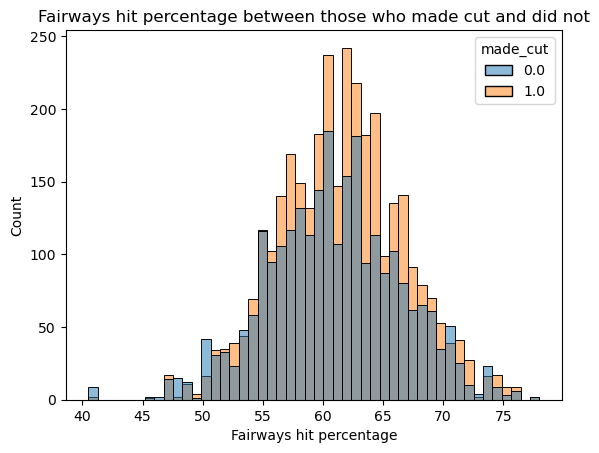

In [62]:
# visualize fairways hit percentage to making the cut 
sns.histplot(data=train, x='fairways_hit', hue='made_cut')
plt.title('Fairways hit percentage between those who made cut and did not')
plt.xlabel('Fairways hit percentage')
plt.show()

##### Verify assumptions
- equal variances and normal distribution
    - Levene's test and Shapiro's test
    - We can use the central limit theorm to assume normalcy

In [63]:
# make sub groups of those who made or didn't make the cut based on fairways hit
made_cut_yes = train[train.made_cut == 1].fairways_hit
made_cut_no = train[train.made_cut == 0].fairways_hit

In [64]:
# compare means of the two groups
print('Fairways hit percentage of players who made cut:', made_cut_yes.mean())
print('Fairways hit percentage of players who did not make the cut:', made_cut_no.mean())

Fairways hit percentage of players who made cut: 61.47240132570047
Fairways hit percentage of players who did not make the cut: 60.8847589424572


In [65]:
#verify equal variance
stat, p = levene(made_cut_yes, made_cut_no)
p

0.00013587711884526196

- Levene's test results: The small p-value (less than alpha = 0.05) suggests that the populations do not have equal variances.

In [66]:
#run stats test
t, p = stats.ttest_ind(made_cut_yes, made_cut_no, equal_var=False)
t, p / 2

(4.11451658708387, 1.9693760558677147e-05)

In [67]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between fairways hit and whether or not a player makes the cut. I will use this feature in my model.

# Does putting average affect whether or not someone will make the cut?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean putting average of players who made the cut >= Mean putting average of players who did not make the cut.

$H_{a}$ : Mean putting average of players who made the cut < Mean putting average of players who did not make the cut.

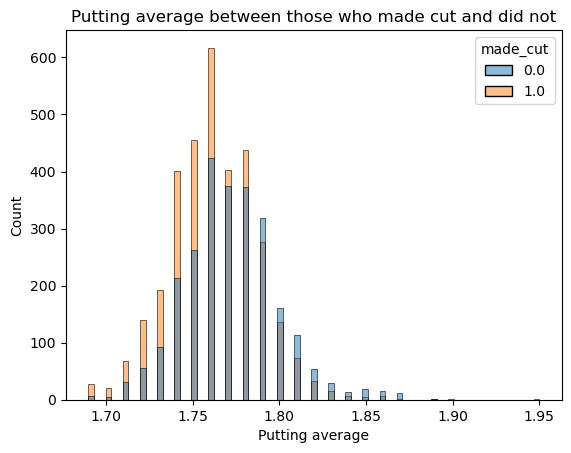

In [68]:
# visualize putting average to making the cut 
sns.histplot(data=train, x='putting_avg', hue='made_cut')
plt.title('Putting average between those who made cut and did not')
plt.xlabel('Putting average')
plt.show()

##### Verify assumptions
- equal variances and normal distribution
    - Levene's test and Shapiro's test
    - We can use the central limit theorm to assume normalcy

In [69]:
# make sub groups of those who made or didn't make the cut based on fairways hit
made_cut_yes = train[train.made_cut == 1].putting_avg
made_cut_no = train[train.made_cut == 0].putting_avg

In [70]:
# compare means of the two groups
print('Putting average of players who made cut:', made_cut_yes.mean())
print('Putting average of players who did not make the cut:', made_cut_no.mean())

Putting average of players who made cut: 1.7614522446520227
Putting average of players who did not make the cut: 1.771582426127545


In [71]:
#verify equal variance
stat, p = levene(made_cut_yes, made_cut_no)
p

0.012160059047307686

- Levene's test results: The small p-value (less than alpha = 0/05) suggests that the populations do not have equal variances.

In [72]:
#run stats test
t, p = stats.ttest_ind(made_cut_yes, made_cut_no, equal_var=False)
t, p / 2

(-14.269191426240049, 1.1442497196485306e-45)

In [73]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between putting average and whether or not a player makes the cut. I will use this feature in my model.

# Exploration Takeway

- In the second iteration of this project. I feature engineered the strokes gained categories. Instead of using just one previous week. I combined two weeks of data to form a 2 week avg category. Visually the graphs are much more convencing of links between the 2 week average of those who make the cut and those who do not.  


- ***Strokes gained putting***
    - Strokes gained putting average of players who made cut: 0.085
    - Strokes gained putting average of players who did not make the cut: -0.39
- ***Strokes gained around the green***
    - Strokes gained around the green average of players who made cut: 0.049
    - Strokes gained around the green average of players who did not make the cut: -0.15
- ***Strokes gained approach***
    - Strokes gained approach average of players who made cut: 0.15
    - Strokes gained approach average of players who did not make the cut: -0.40
- ***Strokes gained off-the-tee***
    - Strokes gained off-the-tee average of players who made cut: 0.088
    - Strokes gained off-the-tee average of players who did not make the cut: -0.23
- ***Strokes gained tee-to-green***    
    - Strokes gained tee-to-green average of players who made cut: 0.28
    - Strokes gained tee-to-green average of players who did not make the cut: -0.77
- ***Strokes gained total***
    - Strokes gained total of players who made cut: 0.37
    - Strokes gained total of players who did not make the cut: -1.16
- ***Driving average***
    - Driving average of players who made cut: 296.77
    - Driving average of players who did not make the cut: 294.44
- ***Fairways hit***
    - Fairways hit percentage of players who made cut: 61.47
    - Fairways hit percentage of players who did not make the cut: 60.89
- ***Putting average***
    - Putting average of players who made cut: 1.761
    - Putting average of players who did not make the cut: 1.771

    
- All features remain statistically significant to the target of whether or not a player will make the cut. 
    - The following features continue to have the biggest impact:
        - Strokes gained approach
        - Strokes gained off-the-tee 
        - Strokes gained tee-to-green 
        - Strokes gained total
- However, in this second iteration. The impact of the above four categories are significantly increased.
    - Comparing the exploration results from the two iterations
        - ***Strokes gained approach***
            - Iteration 1
                - Strokes gained approach average of players who made cut: 0.015
                - Strokes gained approach average of players who did not make the cut: -0.22    
            - Iteration 2
                - Strokes gained approach average of players who made cut: 0.15
                - Strokes gained approach average of players who did not make the cut: -0.40
        - ***Strokes gained off-the-tee***
            - Iteration 1
                - Strokes gained off-the-tee average of players who made cut: 0.04
                - Strokes gained off-the-tee average of players who did not make the cut: -0.17
            - Iteration 2
                - Strokes gained off-the-tee average of players who made cut: 0.088
                - Strokes gained off-the-tee average of players who did not make the cut: -0.23 
        - ***Strokes gained tee-to-green***
            - Iteration 1
                - Strokes gained tee-to-green average of players who made cut: 0.047
                - Strokes gained tee-to-green average of players who did not make the cut: -0.476
            - Iteration 2
                - Strokes gained tee-to-green average of players who made cut: 0.28
                - Strokes gained tee-to-green average of players who did not make the cut: -0.77
         - ***Strokes gained total***
            - Iteration 1
                - Strokes gained total of players who made cut: -0.041
                - Strokes gained total of players who did not make the cut: -0.644
            - Iteration 2
                - Strokes gained total of players who made cut: 0.37
                - Strokes gained total of players who did not make the cut: -1.16
                
            
- Since all features remain statistically significant and do not violate our statistical assumptions. I will run them through various classification models.

- Also, it will be interesting to see how the engineered features will perform in modeling. I believe these new features will lead to a model with more predictive power.

# Modeling
- I have found significance in my independent variables, I will model those against the target using the following models to determine the best predictive model:

>- Decision tree
>- Random forest
>- KNN
>- Logistic regression

### Scale data for modeling

In [74]:
# scale data for modeling
X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = prep.scaled_df_2(train, validate, test)
X_train_scaled.head()

,sg_putt_2wk_avg,sg_arg_2wk_avg,sg_app_2wk_avg,sg_ott_2wk_avg,sg_t2g_2wk_avg,sg_total_2wk_avg,driving_avg,fairways_hit,putting_avg
0,0.465473,0.436966,0.543478,0.579288,0.423706,0.362272,0.428319,0.544000,0.423077
1,0.625746,0.553419,0.656522,0.746764,0.638965,0.630832,0.587611,0.426667,0.346154
2,0.735720,0.493590,0.619565,0.388350,0.388738,0.460041,0.368142,0.306667,0.461538
3,0.596760,0.480769,0.768841,0.737864,0.673025,0.647465,0.490265,0.392000,0.384615
4,0.758738,0.466880,0.710145,0.731392,0.626249,0.682353,0.566372,0.538667,0.346154


### Define baseline and visualize target variable

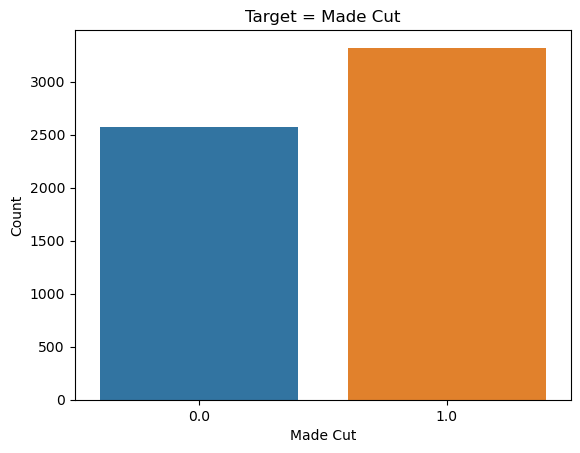

In [75]:
# visualize target
muah.plot_target(train)

In [76]:
# set baseline accuracy
train.made_cut.mean()

0.5634017993549483

# Decision Tree
- run function to iterate through hyperparameters and find best fitting model

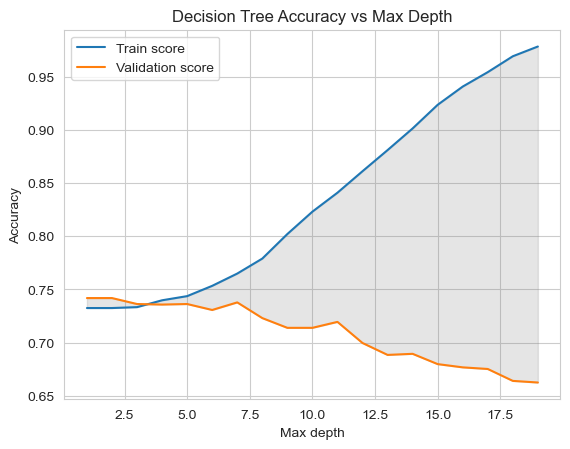

,max_depth,train_acc,val_acc,score_diff
4,5,0.743677,0.736253,0.007424


In [77]:
muah.decision_tree(X_train_scaled, X_validate_scaled, y_train, y_validate)[4:5]

# Random Forest
- run function to iterate through hyperparameters and find best fitting model

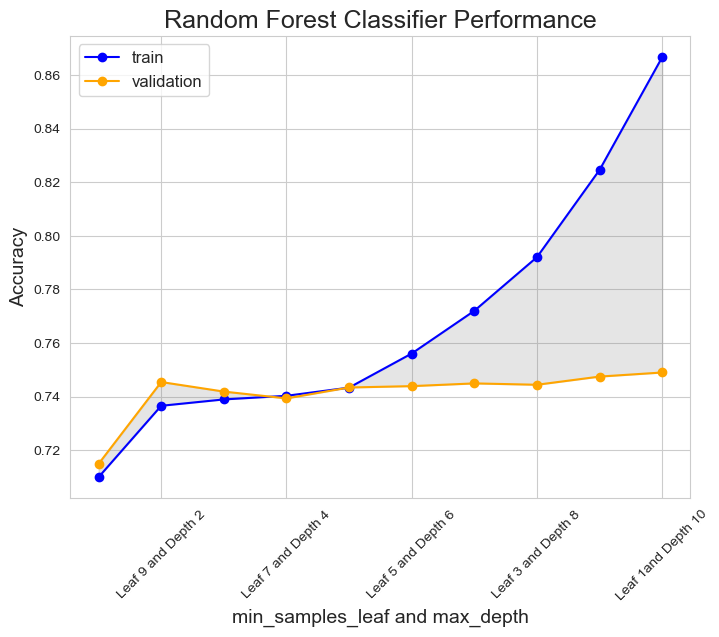

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
4,5,6,0.756069,0.74389,0.012179


In [78]:
muah.random_forest_scores(X_train_scaled, y_train, X_validate_scaled, y_validate)[4:5]

# KNN
- run function to iterate through hyperparameters and find best fitting model

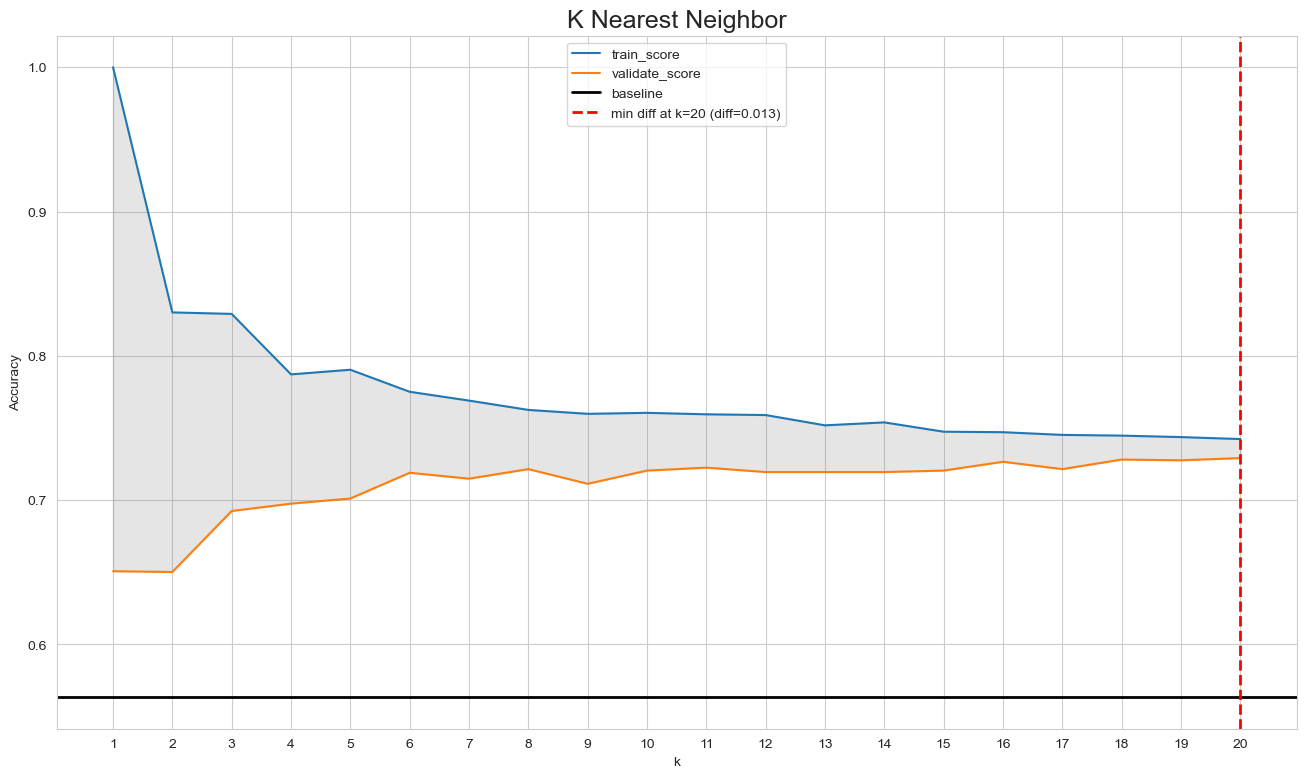

,k,train_score,validate_score,diff_score
19,20,0.742319,0.729124,0.013195


In [79]:
k.k_nearest2(X_train_scaled, y_train, X_validate_scaled, y_validate)[19:20]

# Logistic Regression
- run function to iterate through hyperparameters and find best fitting model

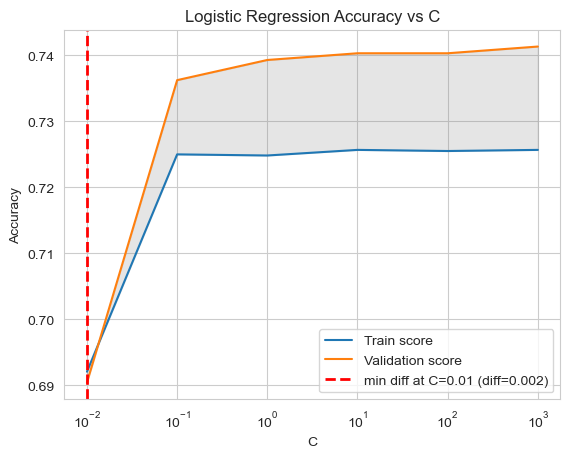

,C,train_score,validate_score,diff_score
0,0.01,0.692073,0.690428,0.001645


In [80]:
muah.plot_logistic_regression(X_train_scaled, X_validate_scaled, y_train, y_validate)[0:1]

# Compare models

| **Decision tree**   |                   |                   |                   |                   |
|---------------------|-------------------|-------------------|-------------------|-------------------|
| Max Depth           |                   | Train Accuracy    | Validate Accuracy | Score Difference  |
| 5                   |                   | 0.743677          | 0.736253          | 0.007424          |
|---------------------|-------------------|-------------------|-------------------|-------------------|
| **Random forest**   |                   |                   |                   |                   |
| Min Samples Leaf    | Max Depth         | Train Accuracy    | Validate Accuracy | Score Difference  |
| 5                   | 6                 | 0.756069          | 0.74389           | 0.012179          |
|---------------------|-------------------|-------------------|-------------------|-------------------|
| **KNN**             |                   |                   |                   |                   |
| k                   |                   | Train Accuracy    | Validate Accuracy | Score Difference  |
| 20                  |                   | 0.742319          | 0.729124          | 0.013195          |
|---------------------|-------------------|-------------------|-------------------|-------------------|
| **Logistic Regression**   |             |                   |                   |                   |
| C                   |                   | Train Accuracy    | Validate Accuracy |  Score Difference |
| 0.01                |                   | 0.692073          | 0.690428          | 0.001645          |
	

> - I am choosing decision tree for my model. The hyperparameter is set at max depth= 5. Test data will be ran through the model.

# Run best model on test data

In [81]:
muah.the_chosen_one(X_train_scaled, X_test_scaled, y_train, y_test)

0.730142566191446